<p style="text-align:center;">
<img src="https://www.un.org/youthenvoy/wp-content/uploads/2014/09/WHO.jpg"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>


# WHO Life Expectancy Project - EDA and Modelling
## Root Team Squared Error

----
### Project Overview
The aim is to construct two linear regression models for life expectancy based on the data provided by the WHO. One model which features as much data as necessary for model performance, and one which is restricted on the basis of what we evaluate to be sensitive data. The data spans 183 countries and records information between 2000 and 2015.

### Deliverables
* Code in sections (EDA, Feature Engineering, Modelling, Testing) in the EDA and Modelling Notebook.
* A final function separately in the Life Expectancy Prediction Model Notebook.

### Team Members
* Fátima González González
* Lydia Drabkin-Reiter
* Ollie Hanlon
* Rowan Jarvis
* Jake Haycocks

----
# Table of Contents
----
1. DATA CLEANING
  - 1.1 Importing Packages and Data
  - 1.2 Cleaning
2. TRAIN/TEST SPLITTING AND OHE
  - 2.1 One-hot Encoding
  - 2.2 80/20 Train/test split
3. DATA EXPLORATION
4. FEATURE ENGINEERING
  - 4.1 Non-linear Relationships
  - 4.2 Feature transformation via Scaling
5. MODELLING
  - 5.1 Model Progression
    - 5.1.1 The First Model
    - 5.1.2 Refining the Model Through Feature Selection
  - 5.2 Best Performing/General Model
    - 5.2.1 Training
    - 5.2.2 Evaluation
  - 5.3 Limited Model
    - 5.3.1 Sensitive Feature
    - 5.3.2 Training
    - 5.3.3 Evaluation
  - 5.4 Limited Model without Adult Mortality

----
# 1.0 DATA CLEANING
----

## 1.1 Importing Packages and Data

In [ ]:
# imports all packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import statsmodels.api as sm
import statsmodels.tools

In [ ]:
# reads in the csv file and assigns to a dataframe
df = pd.read_csv("Life Expectancy Data.csv")

In [ ]:
# seaborn style settings
sns.set(style="darkgrid")
sns.set_context("notebook")
sns.set_palette("Spectral_r")

## 1.2 Cleaning

In [ ]:
df.isna().sum() # checks for nulls in each column, none found

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

Even though we apparently have no nulls, it's worth checking for 0s as unidentified nulls.

In [ ]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


The only column with 0 as a minimum, excepting Economy_status is Alcohol_consumption, let's take a closer look.

In [ ]:
df[df['Alcohol_consumption'] == 0]['Country'].unique() # Checking for cases where alchol consumption is recorded as 0

array(['Saudi Arabia', 'Kuwait', 'Somalia', 'Bangladesh', 'Mauritania',
       'Afghanistan', 'Libya'], dtype=object)

There are a number of countries which reported 0s in at least 1 year over the data collection period and even in the years where a figure was reported the figure is abnormally low. Given the cultural nature of alcohol consumption it doesn't seem reasonable to impute the values based on the wider dataset.

In [ ]:
df[df['Alcohol_consumption'] < 0.1]['Country'].unique() # Checking for cases where alchol consumption is recorded as 0

array(['Saudi Arabia', 'Yemen, Rep.', 'Afghanistan', 'Kuwait',
       'Mauritania', 'Somalia', 'Pakistan', 'Bangladesh', 'Libya', 'Iraq',
       'Iran, Islamic Rep.', 'Indonesia', 'Niger', 'Timor-Leste',
       'Comoros', 'Nepal', 'Bhutan', 'Brunei Darussalam'], dtype=object)

We checked that all columns have been assigned either a developed or developing Economy_status.

In [ ]:
df.Economy_status_Developed.sum() + df.Economy_status_Developing.sum()  == df.shape[0] # Checks all entries are assigned to one of the economy status columns

True

In [ ]:
df.dtypes # checks data types. Columns 'Country' and 'Region' need to be converted to a numerical format.

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [ ]:
# DATA TRANSFORMATION INTO DATE TYPE AND BOOL (this turned out not to be necessary, as it made the model worse rather than better)
# Year, Economy_status_Developed, Economy_status_Developing
# df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year # unecessary
# df['Economy_status_Developed'] = df['Economy_status_Developed'].astype(bool)
# df['Economy_status_Developing'] = df['Economy_status_Developing'].astype(bool)

----
# 2.0 TRAIN/TEST SPLITTING AND OHE
----

## 2.1 One-hot Encoding
We tried running one-hot encoding for the Region and Country columns in order to incorporate them into the model without implying an ordinal relationship but we dropped these features for the model itself.

We decided to run the one-hot encoding before test/train split to ensure the X_train dataframe and the X_test dataframe had the same number of columns.


In [ ]:
# A function to one hot encode required columns
def OHE_fun(df):
        df = df.copy() # so no changes are saved to the df
        df = pd.get_dummies(df, columns = ['Region'], drop_first = True, prefix = 'Region', dtype = int) #OHE region column
        df = pd.get_dummies(df, columns = ['Country'], drop_first = True, prefix = 'Country', dtype = int) #OHE country column

        return df

In [ ]:
df_OHE = OHE_fun(df) # apply the one hot encoding function to the df

## 2.2 80/20 Train/test split
We have used the industry standard for splitting our data: 80% for training and 20% for testing. We perform the split before our EDA in order to avoid data leakage. Else we might have been influenced to make some transformations based on patterns we noticed in the test data during EDA.

In [ ]:
feature_cols = list(df_OHE.columns) # Selects all columns
feature_cols.remove('Life_expectancy') # Drops the target column

In [ ]:
X = df_OHE[feature_cols] # creates a data frame with all the feature columns
y = df_OHE['Life_expectancy'] # creates a series of the target

In [ ]:
# train, test split using a built in function from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
y_train_df = pd.DataFrame(y_train, columns=['Life_expectancy']) # y_train is a series, we need it as a df

# df_train = pd.concat([X_train, y_train_df], axis=1)
df_train = X_train.merge(y_train_df, left_index=True, right_index=True)
X_train.head()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Vietnam,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
2026,2014,7.9,9.3,111.2825,2.45,99,99,22.9,99,99,...,0,0,0,0,0,0,0,0,0,0
651,2004,3.7,4.6,114.2985,13.42,98,98,26.6,96,98,...,0,0,0,0,0,0,0,0,0,0
2225,2014,15.4,18.0,143.0785,6.60,78,83,26.6,79,78,...,0,0,0,0,0,1,0,0,0,0
2357,2010,11.8,13.3,80.9365,4.88,99,98,26.1,99,99,...,0,0,0,0,0,0,0,0,0,0
670,2003,43.3,74.4,495.7265,2.29,83,64,23.2,82,79,...,0,0,0,0,0,0,0,0,0,0


----
# 3.0 DATA EXPLORATION
----

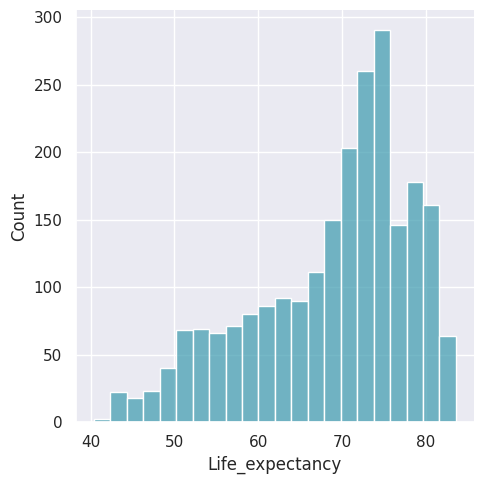

In [ ]:
sns.displot(df_train['Life_expectancy'])

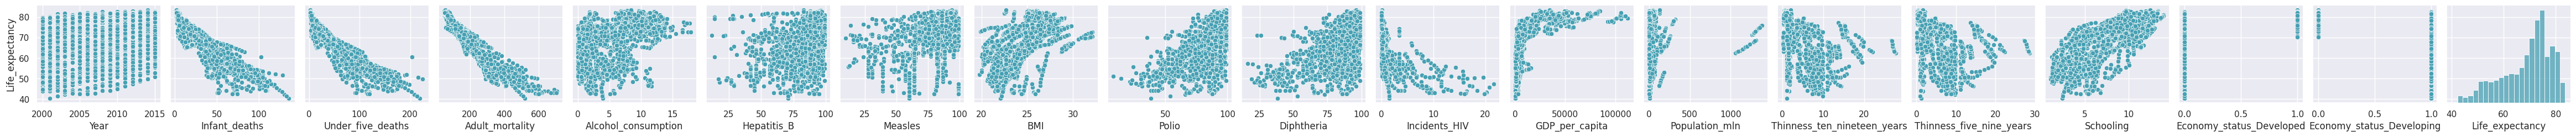

In [ ]:
 pair_columns = ['Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy']
 # Pair plots between life expectancy and all other columns to establish any relationships.
 sns.pairplot(
    df_train,
    x_vars= pair_columns,
    y_vars=['Life_expectancy']
)
plt.show() ## Click or double click to expand


Looking at the pairwise plots, we found apparent non-linear relationships between life expectancy and the following columns: Alcohol, BMI, GDP, Schooling. We'll adress this further at the feature engineering stage in section 4.1.

In [ ]:
sns.kdeplot(data=df_train, x="Schooling", y="Life_expectancy")
plt.show()

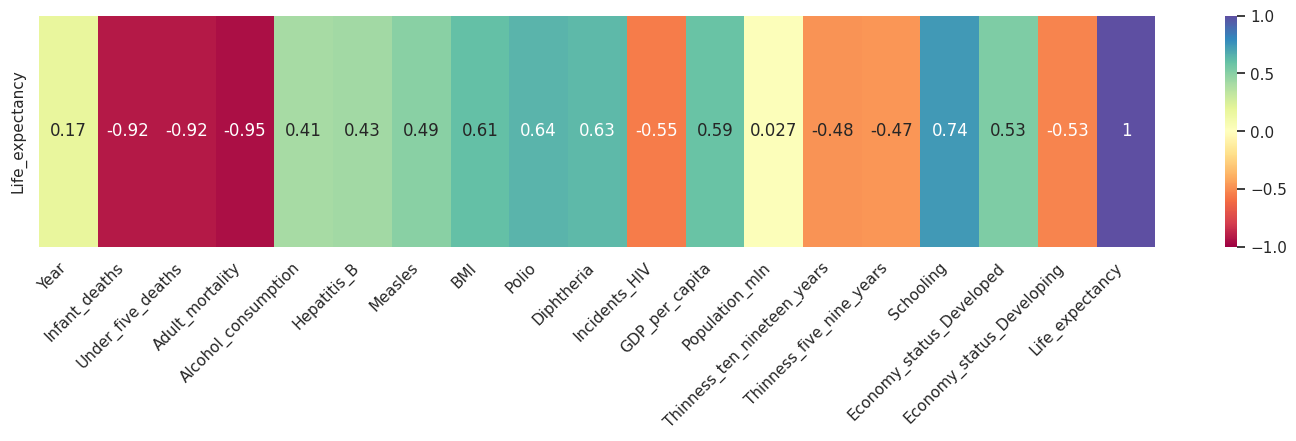

In [ ]:
# Figure to show the correlations between life expectancy and other columns
plt.figure(figsize = (18, 3))
sns.heatmap(df_train[pair_columns].corr()[18:], cmap='Spectral', center=0, annot=True, vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.show()

----
# 4.0 FEATURE ENGINEERING
----

## 4.1 Non-linear Relationships
We noted a few columns which appeared to have a non-linear relationship with Life_expectancy through the above pairplot and correlation matrix. In particular, GDP_per_capita stood out.

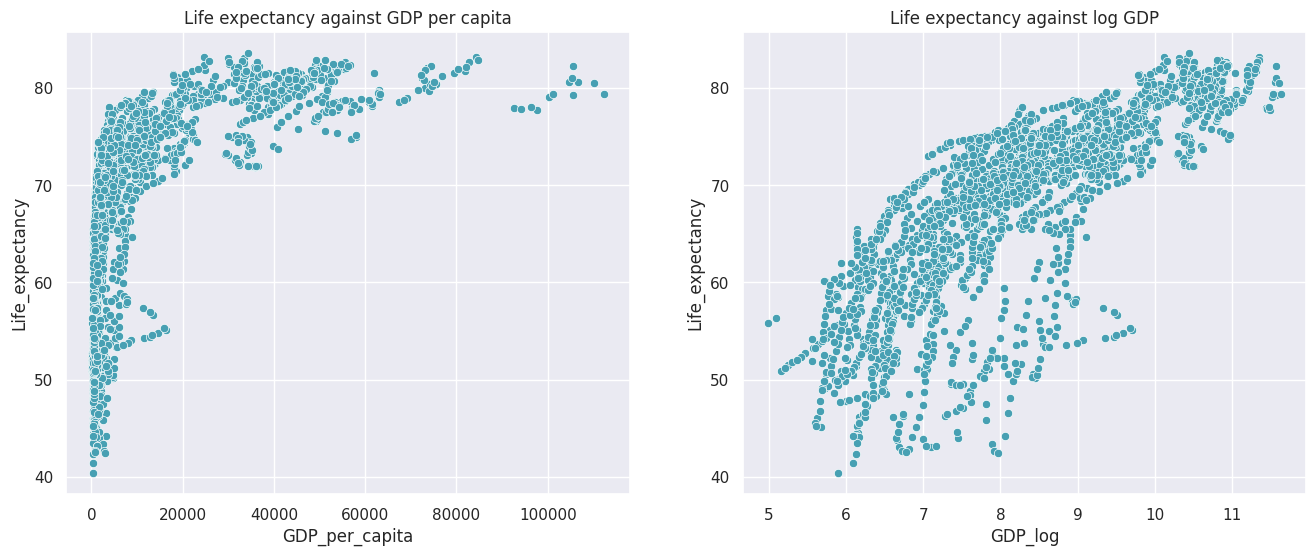

In [ ]:
# plot of GDP_per_capita against life expectancy
fig, axes = plt.subplots(1, 2, figsize = (16,6))
sns.scatterplot(x='GDP_per_capita', y='Life_expectancy', data=df_train, ax=axes[0]) # should be done with X_train data to prevent data leakage
axes[0].set_title('Life expectancy against GDP per capita') # sets a title

# plot of the log of GDP_per_capita against life expectancy
df_train['GDP_log'] = df_train['GDP_per_capita'].apply(lambda x: np.log(x)) # log transform
sns.scatterplot(x='GDP_log', y='Life_expectancy', data=df_train, ax=axes[1])
axes[1].set_title('Life expectancy against log GDP') # sets a title
plt.show()

There's a clear non-linear and possibly logarithmic relationship between GDP_per_capita and Life_expectancy. As such, we created a new feature by transforming Life_expectancy logarithmically and we now see a higher linear correlation between GDP_log and Life_expectancy which is more clearly demonstrated in the following correlation matrix.

In [ ]:
df_train[['Life_expectancy', 'GDP_per_capita', 'GDP_log']].corr()

,Life_expectancy,GDP_per_capita,GDP_log
Life_expectancy,1.000000,0.589713,0.801093
GDP_per_capita,0.589713,1.000000,0.815793
GDP_log,0.801093,0.815793,1.000000


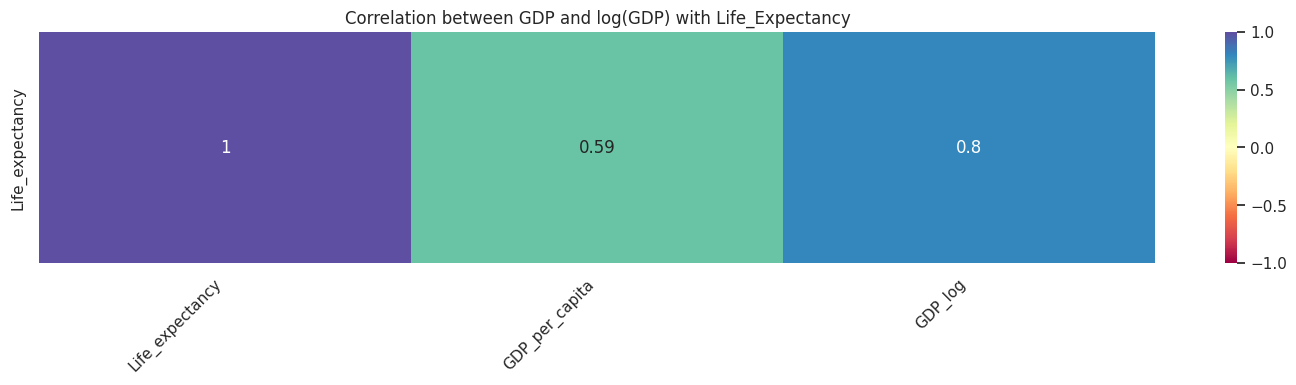

In [ ]:
plt.figure(figsize = (18, 3))
 # correlation matrix between life_expectancy, GP_per_capita and GDP_log
sns.heatmap(df_train[['Life_expectancy', 'GDP_per_capita', 'GDP_log']].corr()[:1], cmap='Spectral', center=0, annot=True, vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation between GDP and log(GDP) with Life_Expectancy')
plt.show()

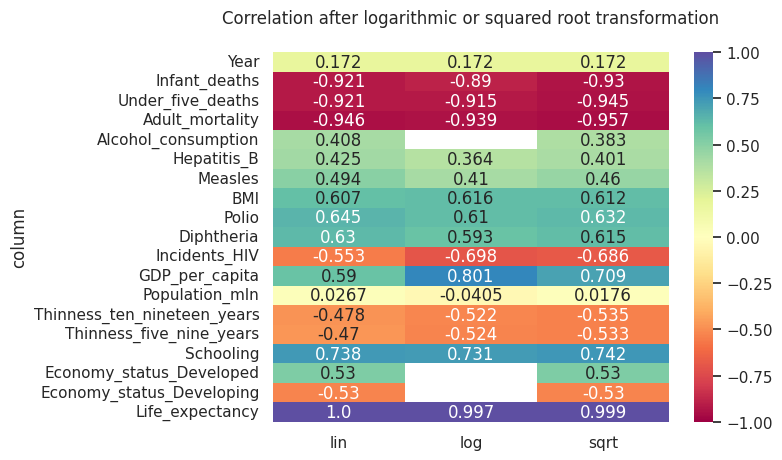

In [ ]:
# Searching for other fields that may benefit from logarithmic or squared root transformations
df1 = df_train.copy()
my_columns = []
lin_corr = []
log_corr = []
sqrt_corr = []
for c in df_train[pair_columns]:
  lin_corr.append(df1['Life_expectancy'].corr(df1[c]))
  df1[f'{c}_log'] = df1[c].apply(lambda x:np.log(x))
  log_corr.append(df1['Life_expectancy'].corr(df1[f'{c}_log']))
  df1[f'{c}_sqrt'] = df1[c].apply(lambda x:np.sqrt(x))
  sqrt_corr.append(df1['Life_expectancy'].corr(df1[f'{c}_sqrt']))
  my_columns.append(c)

data = list(zip(my_columns, lin_corr, log_corr, sqrt_corr))
corr_df = pd.DataFrame(data, columns=["column", "lin", "log", "sqrt"])
corr_df = corr_df.set_index("column")
with sns.axes_style('white'):
  sns.heatmap(corr_df, cmap='Spectral', center=0, annot=True, vmin=-1, vmax=1, fmt='.3')
  plt.title('Correlation after logarithmic or squared root transformation\n')
  plt.show()

GDP_per_capita is the field that benefits the most of a logaritmic transformation

In [ ]:
# Applying the log transform to the train and test sets
X_train['GDP_log'] = X_train['GDP_per_capita'].apply(lambda x: np.log(x))
X_test['GDP_log'] = X_test['GDP_per_capita'].apply(lambda x: np.log(x))

## 4.2 Feature transformation via Scaling

In [ ]:
#Selecting all numerical columns with values outside the range [0:1]
columns_to_scale = ['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 'Alcohol_consumption',
                       'Hepatitis_B', 'Measles', 'BMI', 'Polio','Diphtheria', 'Incidents_HIV',
                       'GDP_per_capita', 'Population_mln', 'Thinness_ten_nineteen_years',
                       'Thinness_five_nine_years', 'Schooling', 'GDP_log', 'Year']

scaler = MinMaxScaler() # intiate the scaler

scaler.fit(X_train[columns_to_scale]); # fitting the scaler

In [ ]:
def feature_eng(df):
    df = df.copy() # to avoid altering the global variable
    df[columns_to_scale] = scaler.transform(df[columns_to_scale]) # scale columns
    df = sm.add_constant(df) # adds the constant required for statsmodel to run
    return df

----
# 5.0 MODELLING
----

## 5.1 Model Progression

### 5.1.1 The First Model
For our first attempt at the model we will include all of the given data, transformed appropriately, to get a baseline in terms of general robustness and RMSE.

In [ ]:
X_train_fe = feature_eng(X_train) # apply feature engineering to the training columns
X_test_fe = feature_eng(X_test) # apply feature engineering to the test columns

In [ ]:
lin_reg_og = sm.OLS(y_train, X_train_fe)
model_og = lin_reg_og.fit() # fits the linear regression model to the training data set
model_og.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4387.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:19:23   Log-Likelihood:                -1512.9
No. Observations:                2291   AIC:                             3418.
Df Residuals:                    2095   BIC:                             4542.
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     49.5339      0.322    154.032      0.000      48.903      50.165
Year                                       2.1602      0.112     19.255      0.000       1.940       2.380
Infant_deaths                             -2.3456      1.105     -2.122      0.034      -4.514      -0.178
Under_five_deaths                         -8.7208      0.973     -8.963      0.000     -10.629      -6.813
Adult_mortality                          -26.7354      0.486    -54.965      0.000     -27.689     -25.782
Alcohol_consumption                       -0.3752      0.243     -1.543      0.123      -0.852       0.102
Hepatitis_B                                0.0622      0.132      0.471      0.638      -0.197       0.321
Measles                                    0.2656      0.139      1.916      0.055      -0.006       0.537
BMI                                       -4.9239      0.881     -5.590      0.000      -6.651      -3.196
Polio                                      0.0194      0.281      0.069      0.945      -0.532       0.571
Diphtheria                                 0.9392      0.260      3.613      0.000       0.429       1.449
Incidents_HIV                              2.5246      0.590      4.280      0.000       1.368       3.681
GDP_per_capita                             3.9942      0.885      4.511      0.000       2.258       5.730
Population_mln                             0.1973      2.085      0.095      0.925      -3.892       4.287
Thinness_ten_nineteen_years               -0.4617      0.223     -2.074      0.038      -0.898      -0.025
Thinness_five_nine_years                  -0.3520      0.228     -1.545      0.123      -0.799       0.095
Schooling                                 -1.1957      0.416     -2.873      0.004      -2.012      -0.380
Economy_status_Developed                  25.9699      0.273     95.100      0.000      25.434      26.505
Economy_status_Developing                 23.5640      0.173    136.235      0.000      23.225      23.903
Region_Asia                                0.5443      0.226      2.408      0.016       0.101       0.988
Region_Central America and Caribbean       6.2401      0.240     25.975      0.000       5.769       6.711
Region_European Union                      5.4015      0.183     29.491      0.000       5.042       5.761
Region_Middle East                         5.0619      0.301     16.823      0.000       4.472       5.652
Region_North America                       5.2818      0.261     20.201      0.000       4.769       5.795
Region_Oceania                             3.5516      0.261     13.630      0.000       3.041       4.063
Region_Rest of Europe                      5.6112      0.240     23.344      0.000     

In [ ]:
# evaluation of our first model on the train set
y_pred = model_og.predict(X_train_fe)

rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)
print(rmse)

0.4683331950056486


In [ ]:
# evaluation of our first model on the test set
y_test_pred = model_og.predict(X_test_fe)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse)

0.49419309048343485


How has our first model performed?

**Key metrics:**
* **RMSE**: 0.468 on train data/0.494 on test data
* **R<sup>2</sup>**: 0.998
* **Condition number**: 1.04 x 10<sup>17</sup>

We have a really strong RMSE and R<sup>2</sup> and our RMSE between training and testing data is close but our condition number is nowhere near acceptable. Condition number is a measure of sensitivity which can reflect an unstable model which can be caused by high levels of collinearity and difference in the range and magnitude of features. This is a problem as it means our model may be very sensitive to changes in input. As we've already scaled all of our features, we're likely looking at extremely high collinearity.

### 5.1.2 Refining the Model Through Feature Selection


Collinearity effectively means some of our features are closely related. The relationships mean that a small change could be amplified. To reduce this effect we'll reduce the number of correlated features we use. To find out which features were related we look at their linear correlations. For example: Infant_deaths and Deaths_under_five were highly correlated and therefore we could drop one of these columns. We proceeded similarly for other columns.

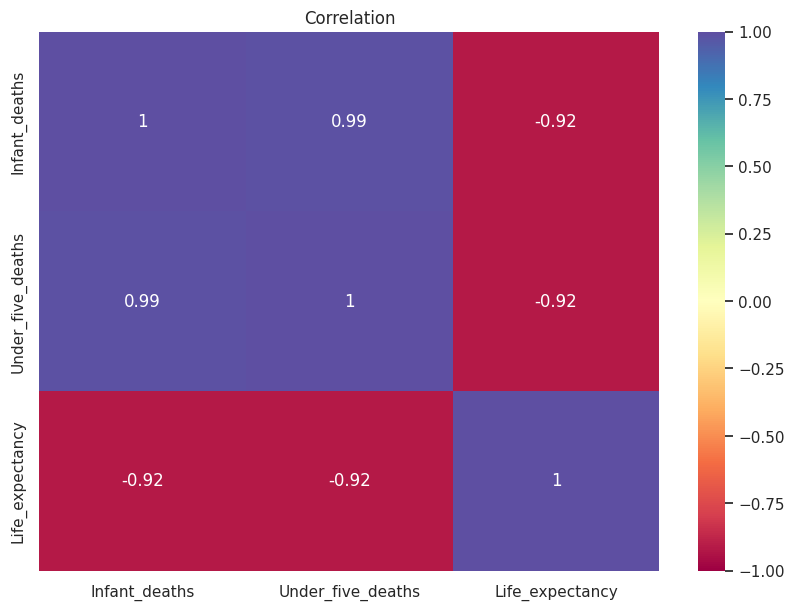

In [ ]:
plt.figure(figsize = (10, 7))
with sns.axes_style('dark'):
  sns.heatmap(df_train[['Infant_deaths', 'Under_five_deaths', 'Life_expectancy']].corr(),
              cmap='Spectral',
              center=0,
              annot=True,
              vmin=-1, vmax=1,)
  plt.title('Correlation')
  plt.show()

#mask = np.triu(df[['Infant_deaths', 'Under_five_deaths', 'Adult_mortality']].corr(numeric_only=True))

There are other columns we can principally remove from our analysis like Year, Country and Region. Country and Region can act like IDs that is to say they may not contain a lot of information in and of themselves but the model can recognize or memorize the typical Life_expectancy of those countries. Year has a relationship with Life_expectancy but there is difficulty in projecting too far into the future and it's inclusion doesn't affect our model much.

Ultimately, our chosen Features are:
* **Adult_mortality**;
* **Infant_deaths**; and
* **GDP_log**.

## 5.2 Best Performing/General Model

### 5.2.1 Training

In [ ]:
X_train_fe = X_train_fe[['const','Adult_mortality', 'Infant_deaths', 'GDP_log']] #Select the columns we want to run linear regression model on

In [ ]:
lin_reg = sm.OLS(y_train, X_train_fe)
model_1 = lin_reg.fit() # fits the linear regression model to the training data set
model_1.summary() #1.26e+20 starting point for condition number

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 3.080e+04
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:19:23   Log-Likelihood:                -4137.3
No. Observations:                2291   AIC:                             8283.
Df Residuals:                    2287   BIC:                             8306.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              76.8209      0.171    448.729      0.000      76.485      77.157
Adult_mortality   -30.2931      0.291   -104.026      0.000     -30.864     -29.722
Infant_deaths     -17.5342      0.298    -58.811      0.000     -18.119     -16.950
GDP_log             4.6601      0.232     20.115      0.000       4.206       5.114
==============================================================================
Omnibus:                       59.848   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.612
Skew:                          -0.385   Prob(JB):                     9.32e-15
Kurtosis:                       3.287   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred = model_1.predict(X_train_fe)

rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)
print(rmse)

1.4724817335743712


### 5.2.2 Evaluation

In [ ]:
y_test_pred = model_1.predict(X_test_fe[['const','Adult_mortality', 'Infant_deaths', 'GDP_log']])
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse)

1.5205416901025863


**Key metrics:**
* **RMSE**: 1.472 on train data/1.521 on test data
* **R<sup>2</sup>**: 0.976
* **Condition number**: 14.6

We want to extract the model intercept and coefficients for our Life Expectancy Prediction Function Notebook

In [ ]:
model_1_df = pd.DataFrame(model_1.params,columns=['Coefficient'])
model_1_df.reset_index(inplace=True)
model_1_df.rename(columns={"index": "Field"}, inplace=True)
model_1_df

,Field,Coefficient
0,const,76.820922
1,Adult_mortality,-30.293077
2,Infant_deaths,-17.534161
3,GDP_log,4.660139


## 5.3 Limited Model

### 5.3.1 Sensitive Feature Selection
Here we selected features for our Limited model, and made choices concerning which features we ought to censor on grounds of sensitivity of the data.

In the table below we have presented our reasoning on how each of the features of the data could be sensitive, e.g., for cultural or religious reasons, or because they contain health data that is indicative of wider societal issues in the Country or Region. We decided it would be reasonable to keep columns with information which is public or widely available in general.


### Table of Sensitive Data and Justification

**Sensitive Data:**

| Sensitive Data                | Reasoning                                           |
|-------------------------------|-----------------------------------------------------|
| Infant_deaths                 | Reflects child mortality rates, a sensitive indicator of healthcare quality and social welfare. |
| Under_five_deaths             | Reflects child mortality rates, a sensitive indicator of healthcare quality and social welfare. |
| Adult_mortality               | Represents the probability of premature death, sensitive as it reflects overall population health. |
| Hepatitis_B                   | Sensitive due to its association with health risks and transmission modes, associated with significant cultural stigma due to the latter. |
| Incidents_HIV                 | Sensitive due to its association with health risks and transmission modes, associated with significant cultural stigma due to the latter.|
| Thinness_ten_nineteen_years   | Reflects population-wide status of nutritional levels and societal norms, sensitive due to its implications for population health and body image. |
| Thinness_five_nine_years      | Reflects population-wide status of nutritional levels and societal norms, sensitive due to its implications for population health and body image. |
| Alcohol_consumption           | Sensitive relating to cultural and religious stigma, and problems with addiction. |

**Non-sensitive Data:**

| Non-sensitive Data            | Reasoning                                           |
|-------------------------------|-----------------------------------------------------|
| BMI                           | A widely used measure of body composition, not linked to privacy. |
| Polio                         | Important for public health monitoring but doesn't carry great cultural stigma, and generally not sensitive, as it relates to epidemiological trends |
| Measles                       | Important for public health monitoring but doesn't carry great cultural stigma, and generally not sensitive, as it relates to epidemiological trends. |
| Diphtheria                    | Important for public health monitoring but doesn't carry great cultural stigma, and generally not sensitive, as it relates to epidemiological trends. |
| GDP_per_capita                | Economic indicator, not sensitive as it does not involve personal information. |
| Population_mln                | Fundamental for demographic analysis but not sensitive data. |
| Schooling                     | Used for assessing education access, not sensitive as it does not involve personal or health-related information. |
| Year                          | Not sensitive as it does not involve personal or health-related data. |

We decided to retain Adult mortality and drop Infant mortality for our Limited model for the following reasons:

1.   Adult mortality is a widely available statistic.
2.   Adult mortality doesn't have the social and cultural stigma associated with e.g., Alcohol consumption and incidents of HIV.
3.   We considered Adult mortality to be significantly less sensitive compared to Infant mortality because:

  * Infant mortality is linked to factors such as prenatal care, maternal health, and healthcare services for infants, and thus is a more sensitive indicator of broader social issues.

  * Infant deaths are often more preventable, and thus high Infant mortality is a sensitive indicator of healthcare expenditure, the status of public healthcare policies, and existing healthcare delivery systems.

  * Infant mortality represents the loss of life at a very vulnerable age, and therefore could be considered a more sensitive indicator of overall population health and well-being.






Ultimately, our chosen Features are:
* **Adult_mortality**
* **GDP_log**



### 5.3.2 Training

In [ ]:
X_train_fe2 = feature_eng(X_train) # creating a second copy of the train and test data for model 2
X_test_fe2 = feature_eng(X_test)

In [ ]:
X_train_fe2 = X_train_fe2[['const','Adult_mortality','GDP_log']] # selecting features deemed non-sensitive

In [ ]:
lin_reg = sm.OLS(y_train, X_train_fe2)
model_2 = lin_reg.fit() # fitting the linear regression model to the training data set
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Thu, 15 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:19:24   Log-Likelihood:                -5192.5
No. Observations:                2291   AIC:                         1.039e+04
Df Residuals:                    2288   BIC:                         1.041e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              71.2658      0.226    314.969      0.000      70.822      71.710
Adult_mortality   -40.0920      0.378   -105.931      0.000     -40.834     -39.350
GDP_log            12.3472      0.303     40.734      0.000      11.753      12.942
==============================================================================
Omnibus:                      205.918   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.206
Skew:                          -0.649   Prob(JB):                     1.33e-74
Kurtosis:                       4.371   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred2 = model_2.predict(X_train_fe2)

rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred2)
print(rmse)

2.333942044185852


### 5.3.3 Evaluation

In [ ]:
y_test_pred2 = model_2.predict(X_test_fe2[['const','Adult_mortality', 'GDP_log']])
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred2)
print(rmse)

2.417974838244699


Key metrics for the limited model:
* **RMSE**: 2.418
* **R<sup>2</sup>**: 0.939
* **Condition number**: 11.7

### Extracting model intercept and coefficient for function

In [ ]:
model_2_df = pd.DataFrame(model_2.params,columns=['Coefficient'])
model_2_df.reset_index(inplace=True)
model_2_df.rename(columns={"index": "Field"}, inplace=True)
model_1_df
# we can save this as as csv and in the other one read it into a dic.

,Field,Coefficient
0,const,76.820922
1,Adult_mortality,-30.293077
2,Infant_deaths,-17.534161
3,GDP_log,4.660139


### Table comparing key results from different Models

|Model|Results (RMSE to 3 d.p.) |
|---:|:---|
|Model 1: Best performing|R-Squared: **0.976** RMSE: **1.471** Cond. No: **16.1**|
|Model 2: Limited|R-Squared: **0.939** RMSE: **2.418**  Cond. No: **11.7**|



## 5.4 Limited Model Without Adult Mortality

If we had chosen not to include Adult Mortality out of considerations of data sensitivity, we could implement the following model.

In [ ]:
non_sensitive_columns = [
    'BMI',
    'Polio',
    'Measles',
    'Diphtheria',
    'GDP_per_capita',
    'Population_mln',
    'Schooling',
    'Year',
    'Economy_status_Developing',
    'GDP_log'
]


In [ ]:
# Select non-sensitive features from training and test data
X_train_non_sensitive = X_train[non_sensitive_columns]
X_test_non_sensitive = X_test[non_sensitive_columns]


NameError: name 'X_train' is not defined

In [ ]:
# Scale the features (normalize between 0 and 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_non_sensitive)
X_test_scaled = scaler.transform(X_test_non_sensitive)


In [ ]:
X_train_scaled = sm.add_constant(X_train_scaled)

In [ ]:
# Initialise list to store VIF values for each iteration
vif_values = []

In [ ]:
# Fit Ordinary Least Squares (OLS) model on scaled training data
lin_reg = sm.OLS(y_train, X_train_scaled)
model = lin_reg.fit()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

while True:
  # Get p-values of features (excluding constant term)
  p_values = model.pvalues[1:]
  # Find the feature with the highest p-value (least significant)
  max_p_value_feature = p_values.idxmax()
  max_p_value = p_values.max()

  # Calculate VIF for remaining features
  vif_data = X_train_scaled[:, 1:]
  vif = [variance_inflation_factor(vif_data, i) for i in range(vif_data.shape[1])]
  vif_values.append(vif)

  # If highest p-value is above threshold (e.g., 0.01), remove the feature
  if max_p_value > 0.01:
    X_train_scaled = np.delete(X_train_scaled, p_values.index.get_loc(max_p_value_feature) + 1, axis=1)
    # Re-fit the model after feature removal
    model = sm.OLS(y_train, X_train_scaled).fit()
  else:
    break

In [ ]:

# Get final selected features (excluding constant term)
selected_features = non_sensitive_columns.copy()

In [ ]:

# Print selected features after backward elimination
print("Selected Features after Stepwise Backward Elimination:")
print(selected_features)

In [ ]:

# Print VIF values for each iteration
print("\nVariance Inflation Factor (VIF):")
for i, vif in enumerate(vif_values):
  print(f"Iteration {i + 1}: {vif}")

In [ ]:
# Print model summary
model.summary()